# Portfolio Optimization using PyPortfolioOpt


5 Stocks:

**L** - Linde plc. LINI (Chemicals) 

**U** - United Health Group UNH (Healthcare)

**M** - Merck MRK (Pharmaceuticals)

**O** - Oracle ORCL (Software)

**S** - Salesforce CRM (Cloud Computing)

## Stock Data

In [437]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

tickers = yf.Tickers('LIN UNH MRK ORCL CRM SPY')

df = tickers.history(period ="5y")['Close']
flo = "floleo98"

[*********************100%***********************]  6 of 6 completed


In [438]:
sp500 = df['SPY']
df = df.drop('SPY', axis = 1)

In [439]:
df.head()

,CRM,LIN,MRK,ORCL,UNH
Date,,,,,
2015-09-15,71.269997,94.738106,46.042610,35.016277,110.862579
2015-09-16,71.879997,96.306618,46.317749,35.274357,111.897034
2015-09-17,72.320000,95.948097,46.395142,33.864128,113.845879
2015-09-18,71.400002,94.227226,44.821693,33.532299,113.116211
2015-09-21,72.139999,94.334778,43.832920,33.947075,114.473946


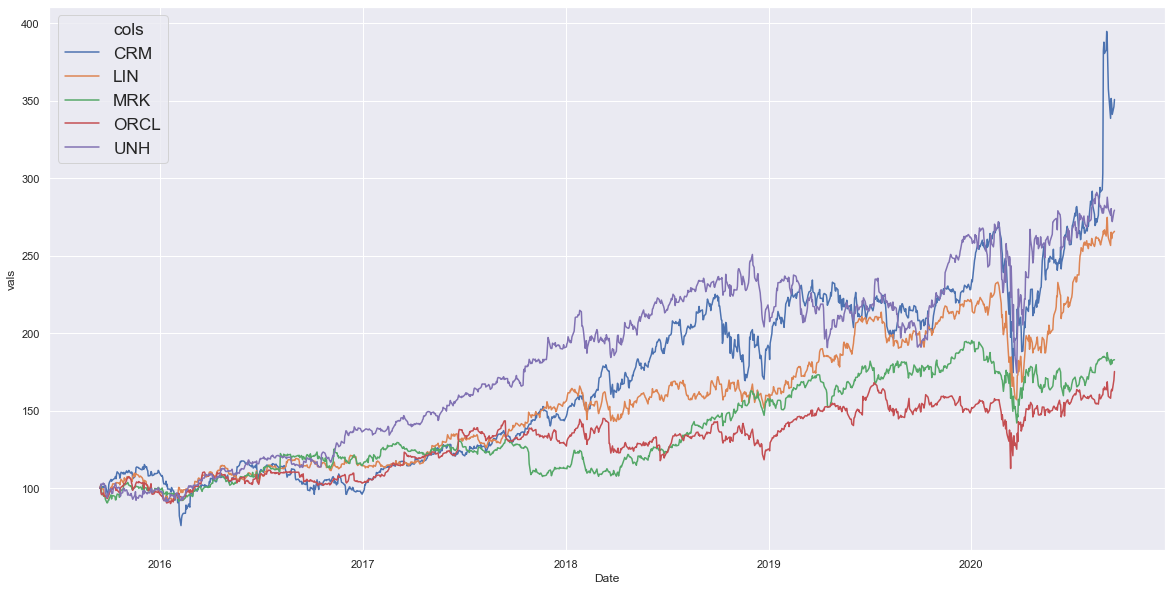

In [440]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))     

sns.set()
df_m = df.divide(df.loc['2015-09-15'])*100
df_m = df_m.reset_index()
df_m = df_m.melt('Date', var_name='cols', value_name='vals')
sns.lineplot(x = df_m.Date, y = df_m.vals, hue = df_m.cols)
plt.legend(fontsize='x-large', title_fontsize='40')


#Welches Unternehmen?

In [441]:
returns = df.pct_change()
returns.head()

,CRM,LIN,MRK,ORCL,UNH
Date,,,,,
2015-09-15,NaN,NaN,NaN,NaN,NaN
2015-09-16,0.008559,0.016556,0.005976,0.007370,0.009331
2015-09-17,0.006121,-0.003723,0.001671,-0.039979,0.017416
2015-09-18,-0.012721,-0.017935,-0.033914,-0.009799,-0.006409
2015-09-21,0.010364,0.001141,-0.022060,0.012369,0.012003


<AxesSubplot:>

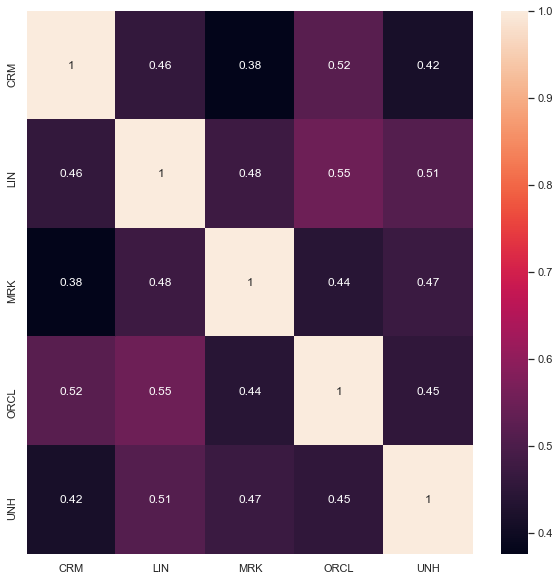

In [442]:
import seaborn as sns
coor_mat = returns.corr()
fig, ax = plt.subplots(figsize=(10,10))         

sns.heatmap(coor_mat, annot = True)

# Simple Buy and Hold Strategy

In [443]:
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

In [444]:
port_ret = (1 + returns).cumprod().dot(weights).subtract(1).multiply(100)

In [445]:
sp_ret = (1 + sp500.pct_change()).cumprod().subtract(1).multiply(100)

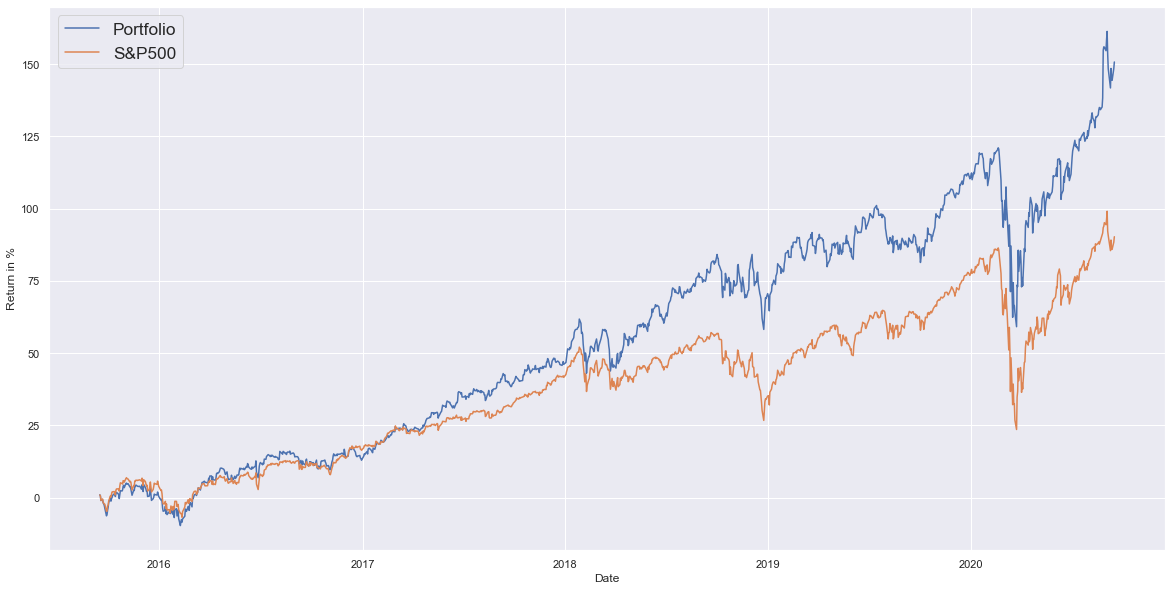

In [446]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))     

sns.set()

sns.lineplot(x = port_ret.index, y = port_ret, label = 'Portfolio')
sns.lineplot(x = sp_ret.index, y = sp_ret, label = 'S&P500')
plt.ylabel('Return in %')
plt.legend(fontsize='x-large', title_fontsize='40')


# Portfolio Optimization

In [447]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

In [448]:
df = df[:'2019-09-15']

In [449]:
mu = expected_returns.ema_historical_return(df, span = 500)
Sigma = risk_models.exp_cov(df, span = 500)

In [450]:
mu

CRM     0.192086
LIN     0.209898
MRK     0.192685
ORCL    0.115272
UNH     0.059077
Name: 2019-09-13 00:00:00, dtype: float64

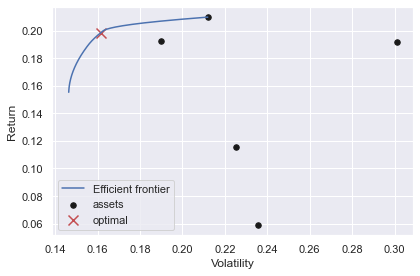

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

In [451]:
cla = CLA(mu, Sigma)
plot_efficient_frontier(cla, 10000)

 ## Portfolio with 18% Expected Return

In [452]:
ef = EfficientFrontier(mu, Sigma)
we = ef.efficient_return(0.18)

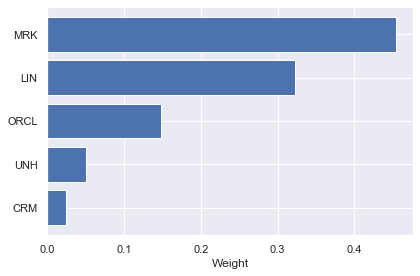

<AxesSubplot:xlabel='Weight'>

In [453]:
plot_weights(we)

In [454]:
ef.portfolio_performance(verbose = True)

Expected annual return: 18.0%
Annual volatility: 15.1%
Sharpe Ratio: 1.06


(0.17999999999999997, 0.1513913543629785, 1.056863522182259)

## Minimum Volatility

In [455]:
ef = EfficientFrontier(mu, Sigma)
raw_weights_minvol = ef.min_volatility()


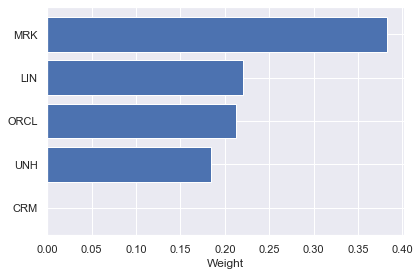

<AxesSubplot:xlabel='Weight'>

In [456]:
plot_weights(raw_weights_minvol)

In [2]:
ef.portfolio_performance(verbose=True)

NameError: name 'ef' is not defined

## Maximum Sharpe

In [458]:
ef = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe = ef.max_sharpe()


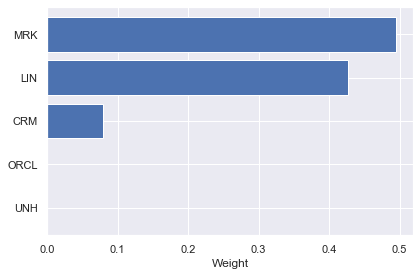

<AxesSubplot:xlabel='Weight'>

In [459]:
plot_weights(raw_weights_maxsharpe)

In [460]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.0%
Annual volatility: 16.3%
Sharpe Ratio: 1.11


(0.1999743341189364, 0.1626954901535928, 1.106203582834604)

## Backtesting

In [461]:
##30%
tickers = yf.Tickers('LIN UNH MRK ORCL CRM SPY')
df = tickers.history(period ="1y")['Close']

sp500 = df['SPY']
df = df.drop('SPY', axis = 1)

[*********************100%***********************]  6 of 6 completed


In [462]:
#buy and hold
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
by_ret = (1 + df.pct_change()).cumprod().dot(weights).subtract(1).multiply(100)

In [463]:
#sp500
sp_ret = (1 + sp500.pct_change()).cumprod().subtract(1).multiply(100)

In [464]:
#23 percent
v = list(we.items())
we_new = [i[1] for i in v]
thirty_ret = (1 + df.pct_change()).cumprod().dot(we_new).subtract(1).multiply(100) 

In [465]:
#min volatility
v = list(raw_weights_minvol.items())
we_new = [i[1] for i in v]

min_vol_ret = (1 + df.pct_change()).cumprod().dot(we_new).subtract(1).multiply(100) 

In [466]:
#max sharpe

v = list(raw_weights_maxsharpe.items())
we_new = [i[1] for i in v]

max_sharpe_ret = (1 + df.pct_change()).cumprod().dot(we_new).subtract(1).multiply(100) 

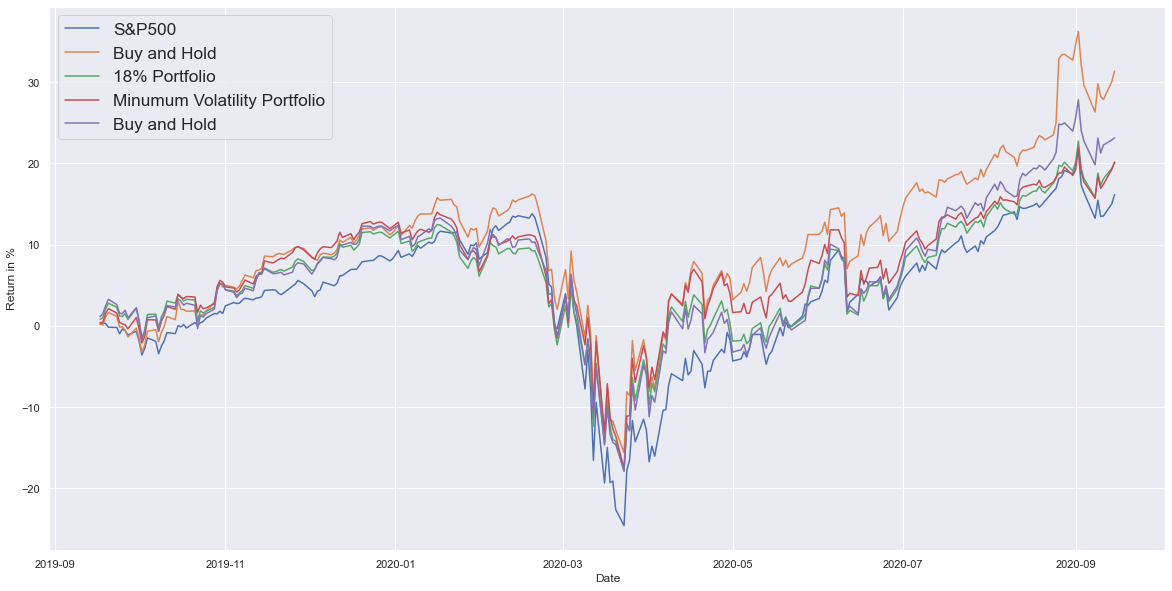

In [467]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))     

sns.set()

sns.lineplot(x = sp_ret.index, y = sp_ret, label = 'S&P500')
sns.lineplot(x = by_ret.index, y = by_ret, label = 'Buy and Hold')
sns.lineplot(x = thirty_ret.index, y = thirty_ret, label = '18% Portfolio')
sns.lineplot(x = min_vol_ret.index, y = min_vol_ret, label = 'Minumum Volatility Portfolio')
sns.lineplot(x = max_sharpe_ret.index, y = max_sharpe_ret, label = 'Buy and Hold')


plt.ylabel('Return in %')
plt.legend(fontsize='x-large', title_fontsize='40')


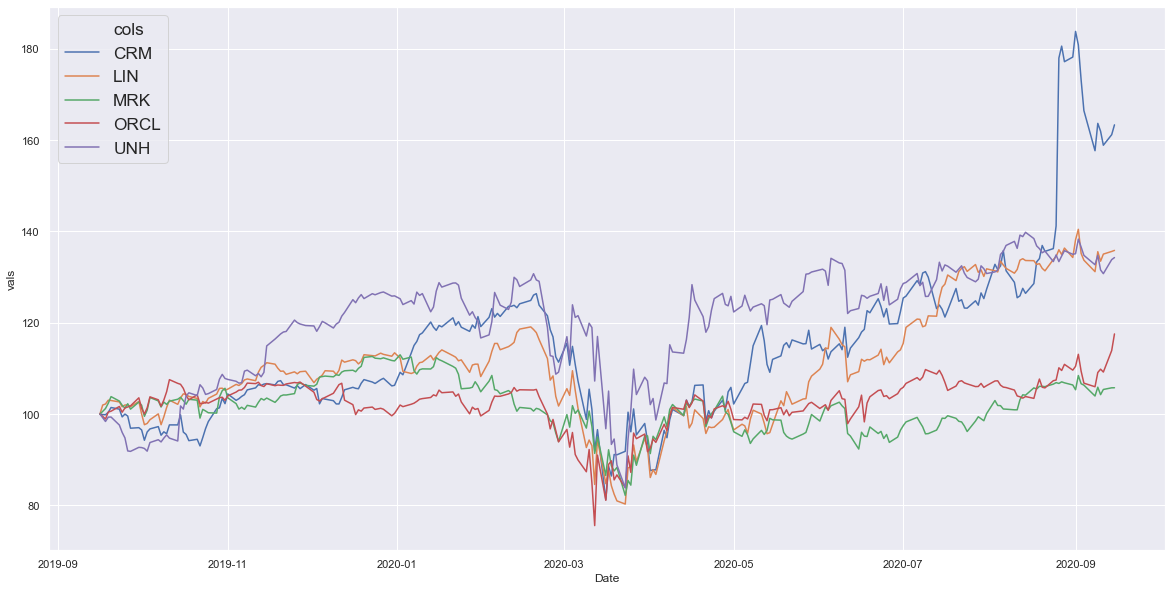

In [468]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))     

sns.set()
df_m = df.divide(df.loc['2019-09-16'])*100
df_m = df_m.reset_index()
df_m = df_m.melt('Date', var_name='cols', value_name='vals')
sns.lineplot(x = df_m.Date, y = df_m.vals, hue = df_m.cols)

plt.legend(fontsize='x-large', title_fontsize='40')


In [1]:
.ewm(span=500)

NameError: name 'index' is not defined